<a href="https://colab.research.google.com/github/Mastaiah/Deep-Learning-Using-Pytorch/blob/main/Pytorch_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load all the required libraries
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch import nn
from torch.nn import functional as F

      torch
          |__ nn
                |__ Module
                |__ Sequential
                |__ Conv(n)d
                |__ Max(n)d
                |__ L1Loss
                |__ Linear
                |__ ReLU
                |__ Sigmoid
                |__ LeakyReLU
                |__ Softmax
                |__ Functional

          |__ optim
                  |__ SGD
                  |__ Adam
                  |__ RMSprop

In [2]:
#Setting up device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device :{device}")

Using device :cuda


In [99]:
weight = 0.7
bias = 0.3

X = torch.arange(start = 0.0 , end = 1.0 ,step = 0.02 ).unsqueeze(dim=1) # using unsqueeze function to convert vector to matrix.
print(f"Feature :\n{X[:5]}")

Y = weight * X + bias
print(f"Target :\n{Y[:5]}")


Feature :
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
Target :
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


In [4]:
# Split the train and test split.

train_split = int ( 0.8 * len(X)) # can also be written as ( 0.8 * X.shape[0])

X_train , Y_train = X[:train_split] , Y[:train_split]
X_test , Y_test = X[train_split:] , Y[train_split:]

X_train.shape , Y_train.shape , X_test.shape , Y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [70]:
def plot_prediction ( train_feature = X_train,
                      train_target = Y_train,
                      test_feature = X_test,
                      test_target = Y_test,
                      prediction = None):

    plt.figure(figsize=(5,3)) # Width = 5 , height = 3

    #Plotting train data (feature and target)
    plt.scatter(x = train_feature.cpu() , y = train_target.cpu() , c = 'b', s = 14 , label = "Train data")
    plt.scatter(x = test_feature.cpu() , y = test_target.cpu() , c = 'g' , s = 14 , label = "Test data" )

    if prediction is not None:
      plt.scatter( x = test_target.cpu(), y = prediction.cpu() , c = 'r', s = 14 , label = "Prediction data" )

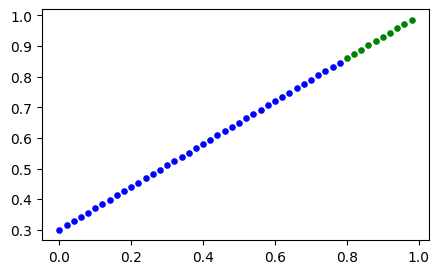

In [50]:
plot_prediction ()

In [8]:
x = torch.randn(1.0, requires_grad=True)

TypeError: ignored

In [8]:
#To fix the above issue
x = torch.randn(1 , requires_grad=True)
x.dtype

torch.float32

In [9]:
x = torch.randn(1, requires_grad=True , dtype=torch.float)
x.dtype

torch.float32

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()  #Invoking the base class (nn.Module) constructor.
    self.linear_layer = nn.Linear(in_features= 1,  #No of feature column/s
                                  out_features= 1) #No of target / label column/s

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [8]:
# Model instantiation
model = LinearRegressionModel()
print(f"Model :\n{model}")
print(f"\nModel state dict :\n{model.state_dict()}")
print(f"\nModel parameters:\n{list(model.parameters())}")
next(model.parameters()).device

Model :
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

Model state dict :
OrderedDict([('linear_layer.weight', tensor([[0.3099]])), ('linear_layer.bias', tensor([0.3003]))])

Model parameters:
[Parameter containing:
tensor([[0.3099]], requires_grad=True), Parameter containing:
tensor([0.3003], requires_grad=True)]


device(type='cpu')

In [9]:
torch.manual_seed(42)
#moving the model to target device ( device agnostic code - moving from CPU to GPU)
model.to(device)

#Set up the loss function
#loss_fn = nn.L1Loss()

#Set up the optimizer .
optimizer = torch.optim.SGD(params = model.parameters() , lr = 0.01)

#Putting data on the target device ( device agnostic code for data)
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

#Training the model


epochs = 1000
epoch_count = []
train_loss_val = []
test_loss_val = []

for epoch in range(epochs):
  #Set the model to training mode.
  model.train()
  # Do the forward pass
  train_pred =  model(X_train)

  #Calculate the loss
  #loss = loss_fn(train_pred , Y_train)
  loss = F.l1_loss(train_pred, Y_train)

  #Zero the gradients of all the parameters in your model.
  optimizer.zero_grad()

  #Do the backpropogation - Loss backward.
  loss.backward()

  # After the gradients of the model parameters have been computed during the backward pass,
  # optimizer.step() is called to update the model parameters based on those gradients.

  optimizer.step()

  #Set the model to evalutation / test mode.
  model.eval()
  with torch.inference_mode(): #Disable the gradient calculation
    #Do the forward pass
    test_preds = model(X_test)

    #Calculate the loss
    #test_loss = loss_fn(test_preds, Y_test)
    test_loss = F.l1_loss(test_preds, Y_test)

  if epoch % 100 == 0:
    epoch_count.append(epoch)
    train_loss_val.append(loss)
    test_loss_val.append(test_loss)
    print(f" Epoch : {epoch} | Train loss : {loss} | Test loss : {test_loss}")





 Epoch : 0 | Train loss : 0.15189228951931 | Test loss : 0.33396992087364197
 Epoch : 100 | Train loss : 0.03524079546332359 | Test loss : 0.08178188651800156
 Epoch : 200 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153
 Epoch : 300 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153
 Epoch : 400 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153
 Epoch : 500 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153
 Epoch : 600 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153
 Epoch : 700 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153
 Epoch : 800 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153
 Epoch : 900 | Train loss : 0.0049748593010008335 | Test loss : 0.010157805867493153


In [10]:
model.state_dict() , loss.item()

(OrderedDict([('linear_layer.weight', tensor([[0.6967]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.3063], device='cuda:0'))]),
 0.006546124815940857)

In [11]:
list(model.parameters())

[Parameter containing:
 tensor([[0.6967]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.3063], device='cuda:0', requires_grad=True)]

In [12]:
(torch.tensor(train_loss_val))

tensor([0.1519, 0.0352, 0.0050, 0.0050, 0.0050, 0.0050, 0.0050, 0.0050, 0.0050,
        0.0050])

In [13]:
torch.tensor(train_loss_val).numpy()

array([0.15189229, 0.0352408 , 0.00497486, 0.00497486, 0.00497486,
       0.00497486, 0.00497486, 0.00497486, 0.00497486, 0.00497486],
      dtype=float32)

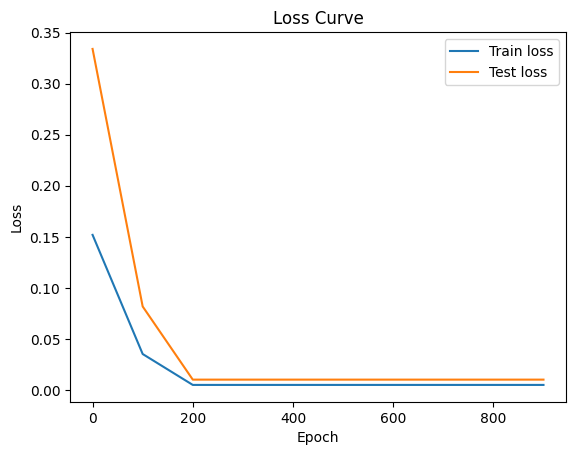

In [14]:
#Plot the loss curves

plt.plot(epoch_count , torch.tensor(train_loss_val).numpy() , label = "Train loss")
plt.plot(epoch_count , torch.tensor(test_loss_val).numpy() , label = "Test loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

#### Difference between model.eval and torch.no_grad / torch.inference_mode.


These two have different goals:

* model.eval() will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will work in eval mode instead of training mode.

* torch.no_grad() impacts the autograd engine and deactivate it. It will reduce memory usage and speed up computations but you won’t be able to backprop (which you don’t want in an eval script).

In [19]:
#Saving the model.

from pathlib import Path

# Create a folder to save the model.
MODEL_FOLDER = Path("models")
MODEL_FOLDER.mkdir( parents = True , exist_ok = True)

# File name to save the model.
MODEL_NAME = "pytorch_linear_model.pth"

#Join paths.
MODEL_SAVE_PATH  = MODEL_FOLDER / MODEL_NAME

#Save the model
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model.state_dict(), f = MODEL_SAVE_PATH)



Saving model to models/pytorch_Linear_Model.pth


In [87]:
#Loading the saved model and doing prediction on new features.

#Create a new model instance.
loaded_model = LinearRegressionModel()

In [88]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8815]])),
             ('linear_layer.bias', tensor([-0.7336]))])

In [89]:
loaded_model.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

<All keys matched successfully>

In [94]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6967]])),
             ('linear_layer.bias', tensor([0.3063]))])

In [95]:
next(loaded_model.parameters()).device

device(type='cpu')

In [93]:
X_test.device

device(type='cuda', index=0)

In [96]:
model.eval()
with torch.inference_mode():
  y_new_preds = loaded_model(X_test.cpu())




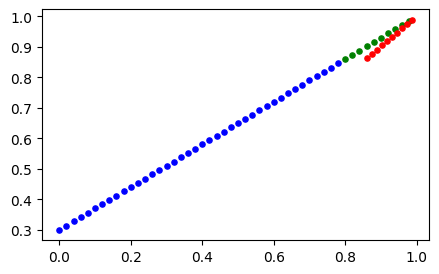

In [97]:
#Plot the prediction.


plot_prediction (prediction = y_new_preds)

In [108]:
# Predicting on new data

X_new = torch.rand(1)

X_new

tensor([0.7411])

In [110]:
model.eval()
with torch.inference_mode():
  y_pred_new = loaded_model(X_new)

print(f" Predicted value { y_pred_new}")
print(f" Actual value { weight * X_new + bias}")

 Predicted value tensor([0.8226])
 Actual value tensor([0.8188])
